<a href="https://colab.research.google.com/github/egecnoob/IA_1/blob/main/Taller_3_3_Aprendizaje_no_supervisado_DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
# Cargar dataset
x = 10000  # Cambia este valor al número de filas que quieras cargar

df = pd.read_csv("Different_stores_dataset.csv", nrows=x)


In [ ]:
# Eliminar columnas irrelevantes
df_clean = df.drop(columns=["invoice_no", "invoice_date", "customer_id"])


In [ ]:
# Crear variable derivada: profit_per_unit
df_clean["profit_per_unit"] = df_clean["selling_price_per_unit"] - df_clean["cost_price_per_unit"]

In [ ]:
# Columnas categóricas y numéricas
categorical_cols = ["gender", "category", "payment_method", "region", "state", "shopping_mall"]
numerical_cols = ["age", "quantity", "selling_price_per_unit", "cost_price_per_unit", "profit_per_unit"]


In [ ]:
# Preprocesamiento
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numerical_cols),
    ("cat", OneHotEncoder(), categorical_cols)
])

In [ ]:
# Aplicar preprocesamiento una vez
X_processed = preprocessor.fit_transform(df_clean)


In [ ]:
# Ejecutar DBSCAN
dbscan = DBSCAN(eps=2.3, min_samples=1)
labels = dbscan.fit_predict(X_processed)

In [ ]:
# Reducir dimensiones para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed)

In [ ]:
# Convertir etiquetas a string para la leyenda
labels_str = labels.astype(str)

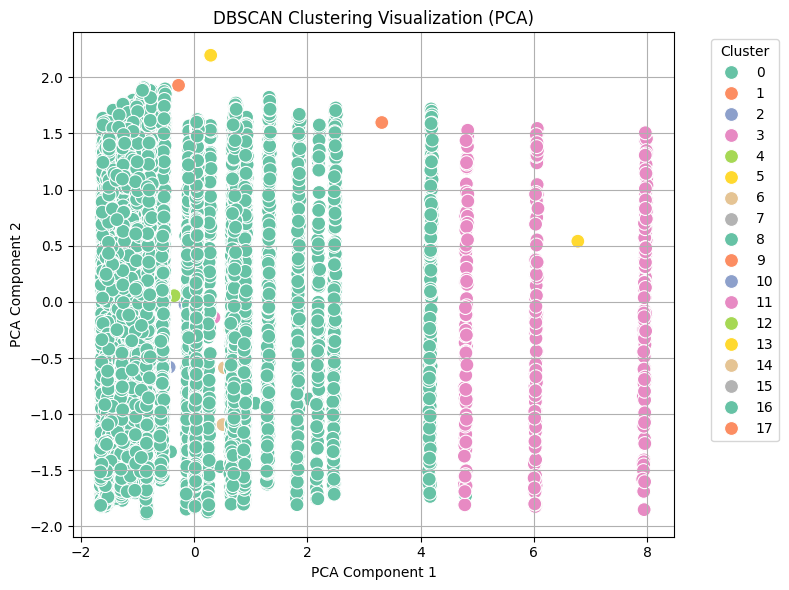

In [ ]:
# Visualización
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_str, palette="Set2", s=100)
plt.title("DBSCAN Clustering Visualization (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Filtrar ruido (-1) si lo hay
mask = labels != -1
X_valid = X_pca[mask]
labels_valid = labels[mask]

# Calcular métricas solo si hay al menos 2 clústeres válidos
if len(set(labels_valid)) > 1:
    silhouette = silhouette_score(X_valid, labels_valid)
    db_index = davies_bouldin_score(X_valid, labels_valid)

    print("✅ Coeficiente de Silueta:", round(silhouette, 3))
    print("✅ Índice de Davies-Bouldin:", round(db_index, 3))
else:
    print("⚠️ No hay suficientes clústeres válidos (excluyendo el ruido) para calcular métricas.")


✅ Coeficiente de Silueta: -0.602
✅ Índice de Davies-Bouldin: 4.046


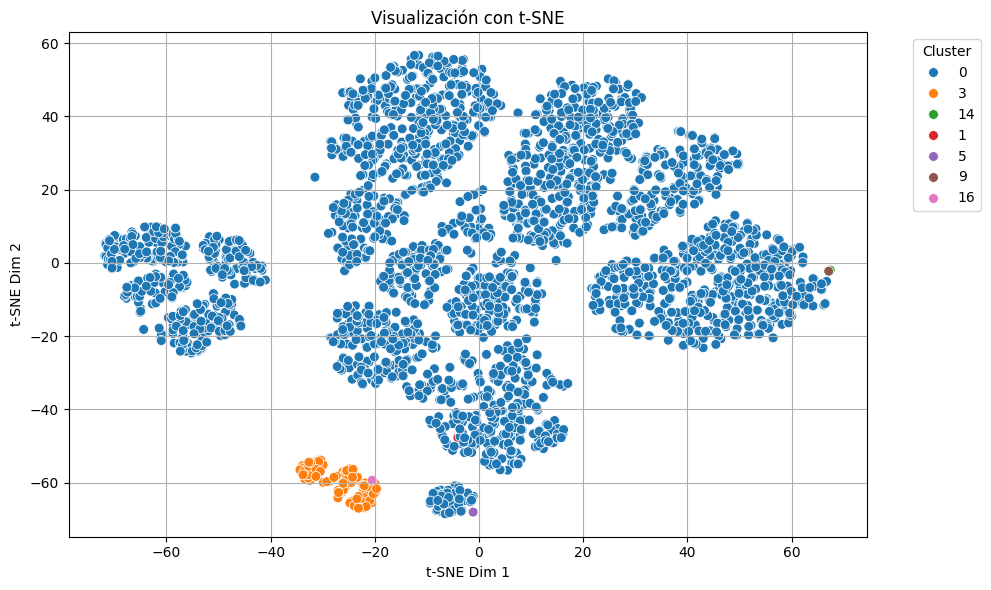

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Convertir a denso
X_dense = X_processed.toarray()

# Muestra aleatoria para t-SNE (por velocidad)
sample_size = 3000
indices = np.random.choice(X_dense.shape[0], size=sample_size, replace=False)
X_sample = X_dense[indices]
labels_sample = labels[indices]

# t-SNE
tsne = TSNE(n_components=2, perplexity=30, max_iter=1000, init="random", random_state=42)
X_tsne = tsne.fit_transform(X_sample)

# Visualización
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=labels_sample.astype(str), palette="tab10", s=50)
plt.title("Visualización con t-SNE")
plt.xlabel("t-SNE Dim 1")
plt.ylabel("t-SNE Dim 2")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
df_clean["cluster"] = labels  # Añadir etiquetas al DataFrame original

# Solo clústeres válidos (excluir ruido)
cluster_profiles = df_clean[df_clean["cluster"] != -1].groupby("cluster").agg({
    "age": "mean",
    "quantity": "mean",
    "profit_per_unit": "mean",
    "gender": pd.Series.mode,
    "payment_method": pd.Series.mode,
    "category": pd.Series.mode
})

print("📊 Perfil promedio de cada clúster:")
print(cluster_profiles)


📊 Perfil promedio de cada clúster:
               age   quantity  profit_per_unit  gender payment_method  \
cluster                                                                 
0        43.546095   2.977833        71.327518  Female           Cash   
1        66.000000   5.000000       100.085000  Female    Credit Card   
2        29.000000   8.000000         0.045000  Female    Credit Card   
3        44.975758   4.039394       475.681818  Female    Credit Card   
4        33.000000  10.000000        75.020000  Female     Debit Card   
5        43.000000  15.000000       472.500000    Male    Credit Card   
6        18.000000  12.000000        32.528000    Male    Credit Card   
7        56.000000   7.000000       150.040000  Female    Credit Card   
8        25.000000  10.000000       225.060000    Male           Cash   
9        67.000000   8.000000        24.396000  Female           Cash   
10       37.000000   9.000000         3.495000    Male           Cash   
11       34.0000

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_dense)  # Usamos la versión completa y densa

inertia = kmeans.inertia_
print("📉 Inercia (KMeans):", round(inertia, 2))


📉 Inercia (KMeans): 58193.66


<ipython-input-228-6a8bb852cf5d>:27: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


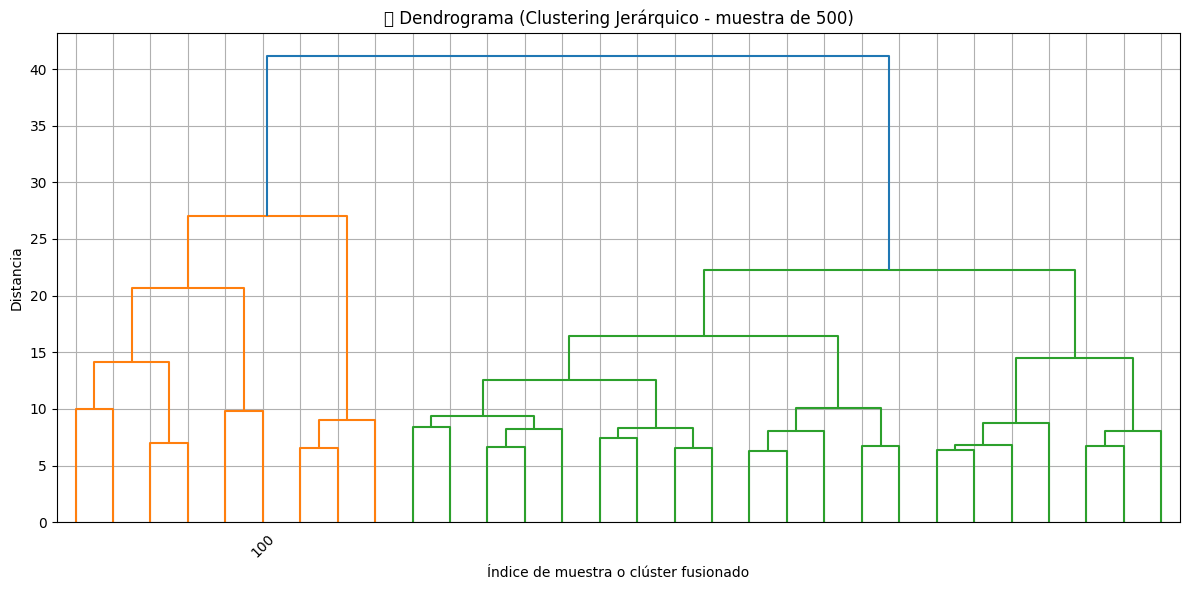

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Paso 1: Asegurar datos densos
X_dense = X_processed.toarray()

# Paso 2: Reducción de dimensionalidad opcional
pca_for_dendro = PCA(n_components=20)  # puedes ajustar esto si quieres más precisión
X_pca_dendro = pca_for_dendro.fit_transform(X_dense)

# Paso 3: Cálculo del linkage
linked = linkage(X_pca_dendro[:500], method='ward')  # muestra de 500 por claridad

# Paso 4: Visualización del dendrograma
plt.figure(figsize=(12, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=False,
           truncate_mode='lastp',
           p=30)  # ajusta p para más/menos ramas visibles
plt.title("📊 Dendrograma (Clustering Jerárquico - muestra de 500)")
plt.xlabel("Índice de muestra o clúster fusionado")
plt.ylabel("Distancia")
plt.grid(True)
plt.tight_layout()
plt.show()
